*Sources :*

[Réduction de dimensionalité. Modèles à variables latentes continues., labs.iro.umontreal.com](http://www-labs.iro.umontreal.ca/~vincentp/ift3395/cours/continuous_latent_variables_print.pdf)

[Positive definite kernel, wikipedia.org](https://en.wikipedia.org/wiki/Positive-definite_kernel)

[Dimensionality reduction. PCA. Kernel PCA., cs.mcgill.ca](https://www.cs.mcgill.ca/~dprecup/courses/ML/Lectures/ml-lecture13.pdf)

[Kernel Principal Component Analysis, ics.uci.edu](https://www.ics.uci.edu/~welling/classnotes/papers_class/Kernel-PCA.pdf)

[Kernel method, wikipedia.org](https://en.wikipedia.org/wiki/Kernel_method)

[Breast cancer, analysis and prediction, kaggle.com](https://www.kaggle.com/vincentlugat/breast-cancer-analysis-and-prediction/notebook)

[sklearn.decomposition.KernelPCA, scikit.learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

[Kernel PCA using different Kernel, github.com](https://github.com/syamkakarla98/Kernel-PCA-Using-Different-Kernels-With-Classification/blob/master/kpca_iris.py)

[The Iris Dataset, scikit.learn.org](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

[Exploring the Iris dataset, kaggle.com](https://www.kaggle.com/bburns/iris-exploration-pca-k-means-and-gmm-clustering)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
from IPython.display import display, HTML
CSS = """.output {align-items: center;}""" #centrer les output
HTML('<style>{}</style>'.format(CSS))

# Contexte

**La réduction de la dimensionalité** 

$\to$ compression des données

$\to$ visualisation des données 2D et 3D

$\to$ extraction de caractéristiques

**Méthodes existantes :**

## Modèles linéaires Gaussiens

- Analyse en Composantes Principales (ACP)<br><br>

- ACP probabiliste<br><br>

- Analyse de facteurs

## Modèles non linéaires ou non Gausssiens

- Kernel ACP<br><br>

- Analyse en Composantes Indépendantes<br><br>

- Réseaux de neurones auto-associateurs<br><br>

- Modélisation de variétés non linéaires

# Kernel ACP

L'intérêt de la K-PCA est de se ramener à une distribution Gaussienne lorsque les données ne la satisfont pas (on ne peut pas utiliser l'ACP classique).

**Dans l'ACP classique les données sont transformées par une application linéaire**

// 

**Une version non linéaire = Kernel ACP peut être créée en appliquant $\phi$ non linéaire**

**Noyau :** $K$ fonction symétrique est appelée noyau défini positivement si $\;\;\sum_{i=1}^{n}\;\; \sum_{j=1}^{n}\;\; c_ic_jK(x_i, x_j)\;\; \geq \;\; 0$

$$\to \text{ en pratique on fait appel à des noyaux linéaires, rbf, polynomiaux et sigmoides principalement}$$

## Principe

Notre **matrice des données $X$** représente les résultats de *p mesures* sur *N données (individus)* :

![](images/X.png)

Vecteur individu i :

![](images/Xi.png)

**Hypothèse 1 :** les données sont centrées

$\text {En réalité} : \left\{
    \begin{array}{ll}
    \text {déjà centrées} \\
    \text {sinon on les centre avec } X_i-\overline{X}
    \end{array}
\right.
$

Matrice de covariance C :

![](images/C.png)

![](images/cij.png)

$$ = \frac{1}{N}\sum_{n=1}^{N} X_iX_i^T$$

$$= XX^T$$

Remarque : $c_{ij} = \frac{1}{N}\sum_{k=1}^{N} x_{k_i}x_{k_j}$ où k est la mesure et i, j les individus

**Principe K-PCA** : on applique une fonction $\phi$ sur X où $\phi$ est une **fonction non linéaire** <br><br>

$$\implies \text {non-linéarisation}$$<br>

$$\phi :\left\{
    \begin{array}{ll}
    x \to y \\
    R^n \to R^p \;;\;n < p
    \end{array}
\right.
$$<br>

$$\implies \text {on se ramène à un espace de plus grande dimension}$$

Remarque : si $\phi$ est linéaire on n'obtient aucune information supplémentaire en projetant les données dans un espace de plus grande dimension !

**Matrice de covariance :**

$$ \overline{C}= \phi(X)\phi(X)^T$$

**Hypothèse 2 :** les données suivent une loi Gaussienne ( loi des grands nombres ) de la forme : <br><br>

$$\frac{1}{{2\pi}^{\frac{N}{2}}|\overline{C}|^{\frac{1}{2}}}e^{-\frac{1}{2}(x-\mu)^T\overline{C}^{-1}(x-\mu)}$$<br>
$$\implies \;\overline{C}\;\text { qualifie la distribution des données autour du barycentre du nuage de points et les vecteurs propres donnent la direction de la distribution}$$

On pose :
![](images/Y.png)

$$\to\; \text {On cherche à calculer } \overline{C}= YY^T \text{ ce qui peut s'avérer complexe voire impossible à cause de la dimension de }Y$$

Et $\overline{C} = UD^2U^T = \sum \lambda_k^2u_ku_k^T$ où $U$ est la matrice des vecteurs propres et $D$ la matrice diagonale des valeurs propres

On cherche à projeter les données sur $U$ avec $z_{i_k} = \lambda_ku_k^T\phi(x_i)$ où i est l'individu et k le vecteur propre kième

**L'astuce du noyau =** permet de trouver les $a_i = (a_{1i}, ..., a{ni})^T$ représentant les vecteurs propres i en utilisant :

$$\phi(x_n)^T\phi(x_m) = k(x_n, x_m)$$

<ul>
$\implies$ permet de calculer le produit scalaire sans calculer la transformation par $\phi$
    </ul>

En effet :

*Théorème 1 : si K est un noyau défini positivement sur un espace X quelconque, alors il existe un espace de Hilbert H muni du produit scalaire et une application* $\phi$ tels que $\phi(x_n)^T\phi(x_m) = k(x_n, x_m)$

*Proposition : tout algorithme dont les vecteurs ne s’expriment qu’en terme de produits scalaires entre vecteurs peut être effectué implicitement dans un espace de Hilbert en remplaçant chaque produit scalaire par l’évaluation d’un noyau défini positivement sur un espace quelconque.*

Choix du noyau : tel que la majorité de l'information soit contenue dans les première valeurs propres obtenues :<br><br>
$$K^* = \underset{K}{arg_{max}}\frac{\sum_i^n \lambda_i(K)}{\sum_i^N \lambda_i(K)} \;\;\text{où } n=3 \text{ par exemple}$$

On a $$G = Y^TY\text{ matrice de Gram}$$

![](images/G.png)

Et $G = VD^2V^T$ où $V$ est la matrice des vecteurs propres et $D$ la matrice diagonale des valeurs propres

 Or $Y = UDV^T \;\;\Longleftrightarrow\;\;U=YVD^{-1}\;\;\Longleftrightarrow\;\;u_k = \frac{Yv_k}{\lambda_k} = \frac{1}{\lambda_k}\sum_j \phi(x_j)v_{k_j}$

Au final :

**Projections :**

$$z_{i_k} = \lambda_ku_k^T\phi(x_i) = \lambda_k(\frac{1}{\lambda_k}\sum_j \phi(x_j)v_{k_j})^T\phi(x_i)$$<br>
$$= \sum^j v_{k_j}\phi(x_j)\phi(x_i) = \sum^j v_{k_j}K(x_j, x_i)$$

# Application sur un exemple

Le **dataset Iris** contient les mesures des largeurs et longeurs des pétales et des sépales de 3 espèces d'iris (setosa, versicolor, virginica).

## Chargement et visualisation des données

In [3]:
iris = datasets.load_iris()

In [4]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])
data['species'] = data.species.replace(dict(enumerate(iris.target_names)))
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [5]:
print(data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
Set = data[data['species']=='setosa']
Ver = data[data['species']=='versicolor']
Vir = data[data['species']=='virginica']

## Valeurs manquantes

In [7]:
null_feat = pd.DataFrame(len(data['species']) - data.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Valeurs manquantes")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

$\implies$ aucune valeur manquante ou NA

## Exploration des données

In [8]:
trace = go.Bar(x = (len(Set), len(Ver), len(Vir)), y = ['setosa', 'versicolor', 'virginica'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'gold', 'lightskyblue', 'red'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Nombre d'individus par 'espèce'")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

$\implies$ même nombre d'individus dans chaque catégorie

**Corrélation globale :**

On regarde les corrélations globales entre les paramètres mesurés (ce que l'on peut faire uniquement si les données suivent la même loi de probabilité).

In [9]:
correlation = data.corr()
matrix_cols = correlation.columns.tolist() #tick labels
corr_array  = np.array(correlation) #convert to array

In [10]:
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Matrice de corrélation des variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

$\implies$ forte corrélation entre (petal length et petal width) et bonne corrélation entre (petal length et sepal length) et entre (petal length et petal width)

**Distribution des mesures :**

In [11]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = Set[data_select]
    tmp2 = Ver[data_select]
    tmp3 = Vir[data_select]
    hist_data = [tmp1, tmp2, tmp3]
    
    group_labels = ['setosa', 'versicolor', 'virginica']
    colors = ['#FFD700', '#7EC0EE', '#FF0000']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [12]:
plot_distribution('sepal length (cm)', .5)
plot_distribution('sepal width (cm)', .5)
plot_distribution('petal length (cm)', 5)
plot_distribution('petal width (cm)', 10)

$\implies$ la distribution est différente selon l'espèce $\to$ les paramètres mesurés ne suivent pas la même loi de probabilité, qui est plus ou moins normales,  selon les espèces. Ainsi on ne pouvait pas faire un test de corrélation global et donc le résultat obtenu précédement (matrice de corrélation) n'a pas de valeur.

**Corrélation des pramètres mesurés selon les espèces :**

In [13]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = Set[feat1],
        y = Set[feat2],
        name = 'setosa',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = Ver[feat1],
        y = Ver[feat2],
        name = 'veriscolor',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))
    
    trace2 = go.Scatter(
        x = Vir[feat1],
        y = Vir[feat2],
        name = 'virginica',
        mode = 'markers',
        marker = dict(color = '#FF0000',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1, trace2]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [14]:
plot_feat1_feat2('sepal length (cm)','sepal width (cm)')
plot_feat1_feat2('petal length (cm)','petal width (cm)')
plot_feat1_feat2('sepal length (cm)','petal length (cm)')
plot_feat1_feat2('sepal width (cm)','petal width (cm)')

$\implies$ comme on observe des clusters définis selon l'espèce, en combinant ces clusters par ACP on peut s'attendre à en obtenir de plus distincts.

## K-PCA

In [15]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [16]:
x = data.loc[:, features].values #separating out the features
y = data.loc[:,['species']].values #separating out the target
x = StandardScaler().fit_transform(x) #standardizing the features

**KPCA :**

In [17]:
target_kpca = data['species']
data_kpca = data.drop('species', axis=1)

target_kpca = pd.DataFrame(target_kpca)

### KPCA à noyau linéaire

Revient en réalité à faire une PCA.

#### Normalisation des données 

In [18]:
X_kpca = data_kpca.values
X_std = StandardScaler().fit_transform(X_kpca)

kpca = KernelPCA(kernel = 'linear')
kpca_std = kpca.fit(X_std, target_kpca).transform(X_std)

kpca_std = pd.DataFrame(kpca_std)
kpca_std = kpca_std.merge(target_kpca, left_index = True, right_index = True, how = 'left')

#### KPCA pie

We only keep 6 components :

In [19]:
eigV = kpca.lambdas_ #explained variance
var_kpca = pd.DataFrame((eigV/np.sum(eigV))[:7])

In [20]:
labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6', 'COMP7 - 30']
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']

trace = go.Pie(labels = labels, values = var_kpca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'KPCA linéaire : composantes et variance expliquée (6 comp = 100%)')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

$\implies$ les 2 premières composantes expliquent la majorité de l'information (95.9%) et si on monte à 3 composantes on explique 99.57%.

#### KPCA plot scatter 

On garde seulement les 2 premières composantes pour l'affichage mais 3 pour calculer la précision de la KPCA :

In [21]:
kpca = KernelPCA(n_components = 3)

kpca_std = kpca.fit(X_std, target_kpca).transform(X_std)
kpca_std = pd.DataFrame(kpca_std,columns = ['COMP1','COMP2', 'COMP3'])
kpca_std = kpca_std.merge(target_kpca,left_index = True,right_index = True,how = 'left')

In [22]:
def kpca_scatter(target,color) :
    tracer = go.Scatter(x = kpca_std[kpca_std['species'] == target]['COMP1'] ,
                        y = kpca_std[kpca_std['species'] == target]['COMP2'],
                        name = target, mode = 'markers',
                        marker = dict(color = color,line = dict(width = 1))
                       )
    return tracer
layout = go.Layout(dict(title = 'KPCA linear Scatter plot (2 comp = 95.9%)',
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP1 = 73%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP2 = 22.9%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 800
                       ))


trace1 = kpca_scatter('setosa','#FFD700')
trace2 = kpca_scatter('versicolor','#7EC0EE')
trace3 = kpca_scatter('virginica','#FF0000')
plots = [trace3, trace2,trace1]
fig = go.Figure(data = plots,layout = layout)
py.iplot(fig)

$\implies$ on retrouve 3 clusters correspondant aux 3 espèces mais les nuages de points de virginica et versicolor se recoupent ce qui rend leur identification compliquée. La séparation obtenue n'est donc pas idéale.

### KPCA à noyau sigmoide

In [23]:
target_kpcas = data['species']
data_kpcas = data.drop('species', axis=1)

target_kpcas = pd.DataFrame(target_kpcas)

#### Normalisation des données 

In [1]:
X_kpcas = data_kpcas.values
X_stds = StandardScaler().fit_transform(X_kpcas)

kpcas = KernelPCA(kernel = 'sigmoid')
kpcas_std = kpcas.fit(X_stds, target_kpcas).transform(X_stds)

kpcas_std = pd.DataFrame(kpcas_std)
kpcas_std = kpcas_std.merge(target_kpcas, left_index = True, right_index = True, how = 'left')

NameError: name 'data_kpcas' is not defined

#### KPCA pie

We only keep 6 components :

In [25]:
eigVs = kpcas.lambdas_ #explained variance
var_kpcas = pd.DataFrame((eigVs/np.sum(eigVs))[:7])

In [26]:
labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6', 'COMP7 - 30']
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']

trace = go.Pie(labels = labels, values = var_kpcas[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'KPCA sigmoide : composantes et variance expliquée (6 comp = 99.9%)')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

$\implies$ les 2 premières composantes expliquent la majorité de l'information (93.4%) et si on prend 3 composantes on explique 96.29% ce qui reste inférieur à la KPCA avec noyau linéaire $\to$ on peut s'attendre à un moins bon résultat final.

#### KPCA plot scatter 

On garde seulement les 2 premières composantes pour l'affichage et 3 pour le calcul de la précision de la KPCA :

In [27]:
kpcas = KernelPCA(n_components = 3, kernel = 'sigmoid')

kpcas_std = kpcas.fit(X_stds, target_kpcas).transform(X_stds)
kpcas_std = pd.DataFrame(kpcas_std,columns = ['COMP1','COMP2', 'COMP3'])
kpcas_std = kpcas_std.merge(target_kpcas,left_index = True,right_index = True,how = 'left')

In [28]:
def kpcas_scatter(target,color) :
    tracer = go.Scatter(x = kpcas_std[kpcas_std['species'] == target]['COMP1'] ,
                        y = kpcas_std[kpcas_std['species'] == target]['COMP2'],
                        name = target, mode = 'markers',
                        marker = dict(color = color,line = dict(width = 1))
                       )
    return tracer
layout = go.Layout(dict(title = 'KPCA sigmoid Scatter plot (2 comp = 93.4%)',
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP1 = 71.9%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP2 = 21.5%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 800
                       ))


trace1 = kpcas_scatter('setosa','#FFD700')
trace2 = kpcas_scatter('versicolor','#7EC0EE')
trace3 = kpcas_scatter('virginica','#FF0000')
plots = [trace3, trace2,trace1]
fig = go.Figure(data = plots,layout = layout)
py.iplot(fig)

$\implies$ on retrouve la même allure qu'avec la KPCA à noyau linéaire, visuellement il est impossible de les distinguer.

### Evaluation du clustering

**GaussianMixture** est un outil de clustering qui permet d'identifier les clusters lorsque les données suivent des lois de répartition Gaussiennes, ce qui est plus ou moins notre cas.
Nous allons utiliser GaussianMixture pour comparer le clustering des données avant et après KPCA c'est-à-dire pour quantifier la perte d'information engendrée par la KPCA.

1. *Clustering avant KPCA :*

In [29]:
gmm = GaussianMixture(3)
gmm.fit(data.drop(columns = ['species']));

In [30]:
y_cluster_gmm = gmm.predict(data.drop(columns = ['species']))
#y_cluster_gmm

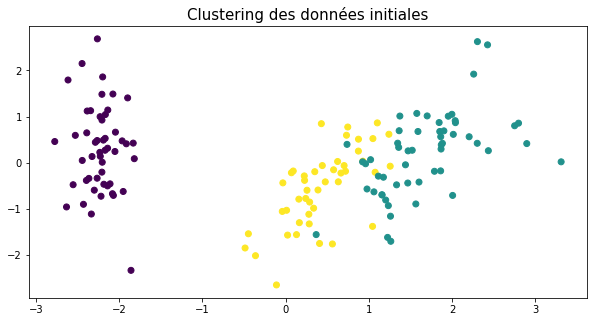

In [31]:
x = kpca_std['COMP1']
y = kpca_std['COMP2']

im,ax = plt.subplots(1, 1,figsize=(10,5))
ax.scatter(x, y, c = y_cluster_gmm)
ax.set_title("Clustering des données initiales",fontsize=15)
plt.show()

In [32]:
score_i = adjusted_rand_score(iris.target, y_cluster_gmm)
score_i

0.9038742317748124

2. *Clustering après KPCA linéaire :*

In [33]:
gmm = GaussianMixture(3)
gmm.fit(kpca_std.drop(columns =['species']));

In [34]:
y_cluster_gmm_kpca = gmm.predict(kpca_std.drop(columns = ['species']))
#y_cluster_gmm_kpca

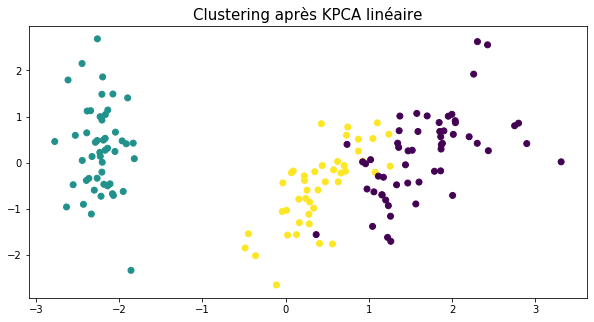

In [35]:
x = kpca_std['COMP1']
y = kpca_std['COMP2']

im,ax = plt.subplots(1, 1,figsize=(10,5))
ax.scatter(x, y, c = y_cluster_gmm_kpca)
ax.set_title("Clustering après KPCA linéaire",fontsize=15)
plt.show()

In [36]:
score_kpca = adjusted_rand_score(iris.target, y_cluster_gmm_kpca)
score_kpca

0.8859501978730681

$\implies$ en prenant 3 composantes principales au lieu de 2 ( qui expliquent environ 99% des données) la précision du clustering passe de 68% à 89%, toutefois le résultat est inférieur à celui obtenu sur les données initiales. Il faut aussi noter que dans notre cas les données initiales sont représentées dans un espace de dimension 4, ce qui n'est pas élevé, donc l'utilisation d'une PCA ou d'une KPCA n'est pas vraiment justifiée pour déterminer les clusters.<br>
En effet, si la PCA et la KPCA sont recommandées lorsque les données initiales sont contenues dans un espace de trop haute dimension, elles conduisent toujours à une perte d'information, ce qui explique que la précision du clustering soit toujours inférieure à celle obtenue sur les données non traitées par PCA ou KPCA. On peut dire que la PCA et la KPCA sont des outils puissants pour obtenir une bonne approximation des clusters lorsque la dimensionalité est trop élevée, car dans le cas d'une grande dimensionalité on peut ne pas disposer pas de méthode, ou tout du moins de méthode rapide ou efficace pour faire du clustering.

2. *Clustering après KPCA sigmoide :*

In [37]:
gmm = GaussianMixture(3)
gmm.fit(kpcas_std.drop(columns =['species']));

In [38]:
y_cluster_gmm_kpcas = gmm.predict(kpcas_std.drop(columns = ['species']))
#y_cluster_gmm_kpca

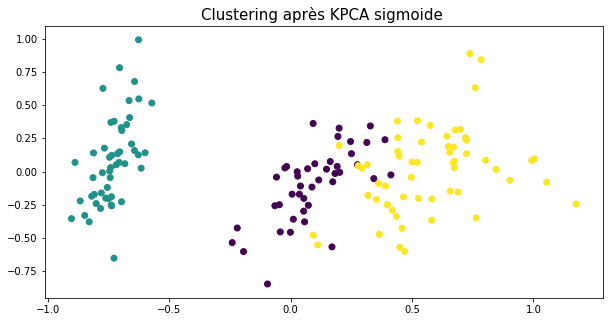

In [39]:
x = kpcas_std['COMP1']
y = kpcas_std['COMP2']

im,ax = plt.subplots(1, 1,figsize=(10,5))
ax.scatter(x, y, c = y_cluster_gmm_kpcas)
ax.set_title("Clustering après KPCA sigmoide ",fontsize=15)
plt.show()

In [40]:
score_kpcas = adjusted_rand_score(iris.target, y_cluster_gmm_kpcas)
score_kpcas

0.868475753865429

$\implies$ comme prévu on obtient une précision de clustering infériéure à celle d'une KPCA avec un noyau linéaire (PCA) (0.89%) qui semble donc mieux expliquer les données et donc être plus adaptée.